# 02 – Preprocessing & Feature Engineering
### Car Price Prediction Using Machine Learning
Group Assignment 02 - CCS3012 - Data Analytics  
Submission Date: 16th September 2025

---

### **Group 11**
-  **FC211034 - N.D. Samararathne Kodikara**
-  **FC211013 - N.W.V. Tharindu Pabasara**
-  **FC211025 - W.M.M.C.B. Wijesundara**



---

### **Supervisor**
**Ms. Dilmi Praveena**  
*Faculty of Computing*  
*University of Sri Jayewardenepura*

---



## 📌 Objectives

This notebook builds upon the cleaned dataset produced in **Notebook 01 — Data Exploration & Cleaning**.  
The focus here is on understanding the dataset more deeply, validating insights statistically, and preparing features for modeling.  

---

###  1. Descriptive Analytics  
- Summarize numerical variables.  
- Explore categorical variables.  
- Visualize distributions.  
- Examine bivariate relationships.  

###  2. Inferential Analytics  
- Perform hypothesis testing to assess whether differences between groups are statistically significant.  
- Check correlation strength and direction.  
- Identify potential multicollinearity issues between predictors.  

###  3. Feature Engineering  
- Create new features.  
- Extract useful info from text-based or categorical columns.  
- Handle skewed features.  
- Generate interaction terms if useful.  

###  4. Preprocessing Setup  
- Encode categorical variables.  
- Normalize/scale numerical features. 
- Standardize target variable if needed.  

###  5. Train/Test Split  
- Split dataset into **training** and **testing** sets for unbiased model evaluation.  
- Save processed datasets and transformation pipeline for **Notebook 03 — Modeling**.  



> By the end of this notebook, we will have a **fully processed dataset** with engineered and encoded features, ready for predictive modeling.  

---


### 📂 Input  
- `clean_data.csv` saved in `Data/processed/`  


### 📦 Output  


---

### 📊 Dataset Overview
**Dataset:** Car price dataset cleaned.  
**columns include**:   
- `id`, `price` (target variable),  `levy`,  `manufacturer`,  `model`,  `prod_year`,  `category`,  `leather_interior`,  `fuel_type`, `engine_volume`,  `mileage`,  `cylinders`,  `gear_box_type`,  `drive_wheels`,  `doors`,  `wheel`, `color`,  `airbags`,  `turbo` (derived in Notebook 01)


> **Dataset stats:** 19,237 rows × 19 features | Target variable: `price` | Problem type: Regression


## Setup & imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Statistical functions
from scipy import stats

from prettytable import PrettyTable # For creating formatted tables in the console.
from tabulate import tabulate
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Next we load the cleaned dataset.
df = pd.read_csv("./Data/processed/clean_data.csv")

In [3]:
# Prints the first 5 rows of the DataFrame.
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,45654403,13328,1399.0,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6,automatic,4x4,04-may,left wheel,silver,12,False
1,44731507,16621,1018.0,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6,tiptronic,4x4,04-may,left wheel,black,8,False
2,45774419,8467,0.0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4,variator,front,04-may,right-hand drive,black,2,False
3,45769185,3607,862.0,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4,automatic,4x4,04-may,left wheel,white,0,False
4,45809263,11726,446.0,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4,automatic,front,04-may,left wheel,silver,4,False


In [4]:
# Prints the name of each column in the dataset, the number of non-null values it contains, and its data type.
def df_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]

    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        table.add_row([col, non_null_count, dtype])

    print(table)

df_info(df)

+------------------+----------------+---------+
|      Column      | Non-Null Count |  Dtype  |
+------------------+----------------+---------+
|        id        |     15697      |  int64  |
|      price       |     15697      |  int64  |
|       levy       |     15697      | float64 |
|   manufacturer   |     15697      |  object |
|      model       |     15697      |  object |
|    prod_year     |     15697      |  int64  |
|     category     |     15697      |  object |
| leather_interior |     15697      |  object |
|    fuel_type     |     15697      |  object |
|  engine_volume   |     15697      | float64 |
|     mileage      |     15697      |  int64  |
|    cylinders     |     15697      |  int64  |
|  gear_box_type   |     15697      |  object |
|   drive_wheels   |     15697      |  object |
|      doors       |     15697      |  object |
|      wheel       |     15697      |  object |
|      color       |     15697      |  object |
|     airbags      |     15697      |  i

💡 **Observations:**  
- The data set appears unchanged and matches the previously saved version.

Le't start...

# Section 1: Descriptive Analytics

## Numerical Features
**Features to analyze: price, levy, mileage, engine_volume, cylinders, airbags, prod_year**

### Analyze `price`

In [5]:
# Summary statistics
price_stats = df['price'].describe()
print("Price Summary:\n", price_stats)

# other metrics
print("\nSkewness:", df['price'].skew())
print("Kurtosis:", df['price'].kurt())

Price Summary:
 count    1.569700e+04
mean     2.028445e+04
std      2.108237e+05
min      1.000000e+00
25%      7.527000e+03
50%      1.426900e+04
75%      2.338900e+04
max      2.630750e+07
Name: price, dtype: float64

Skewness: 123.52934090055949
Kurtosis: 15402.583002061287


💡 **Observations:**  
- The mean price is around $20,284, while the median is $14,269, indicating a right-skewed distribution.
- The minimum price is $1 (likely an error or placeholder), and the maximum is $26,307,500, suggesting the presence of extreme outliers.  
- The standard deviation is very high ($210,823), reflecting large variability in car prices.

---
- Skewness = 123.53 → extremely right-skewed.

- Kurtosis = 15,402.58 → heavy tails, confirming extreme outliers.

> *🧠 we will Consider log transformation now and outlier handling in Feature engineering*

In [6]:
# Initialize list for skewed features
skewed_features = []

# Example: add 'price' after detecting skew
skewed_features.append('price')

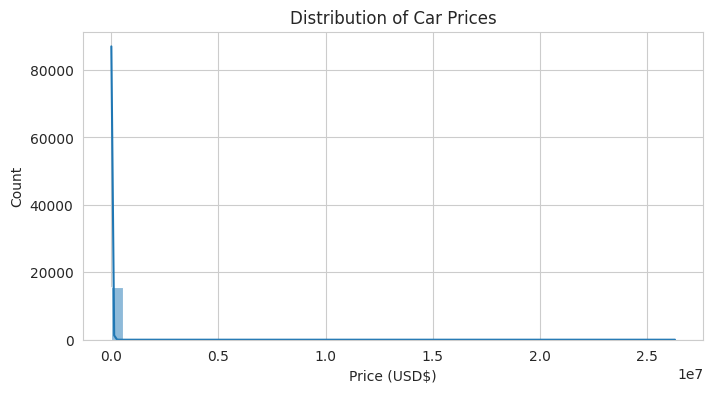

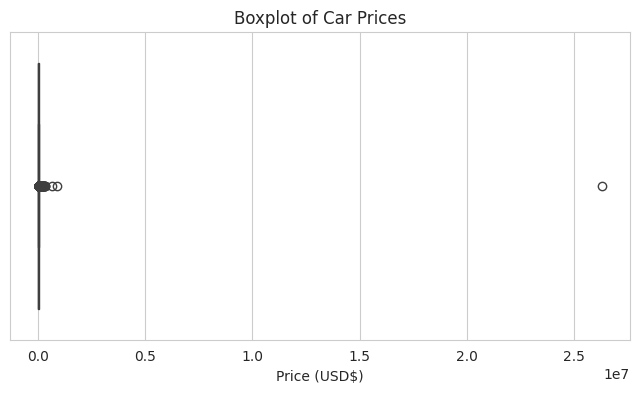

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (USD$)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Prices")
plt.xlabel("Price (USD$)")
plt.show()


💡 **Observations:**  
- The raw price distribution is highly skewed, with extreme outliers reaching up to 26M USD.
This makes the plots look compressed, hiding the majority of the data.
> *🧠 To better visualize the bulk of the dataset, we zoom into the 95th percentile, which removes the top 5% of extreme values from the plot (without actually deleting them from the dataset).*

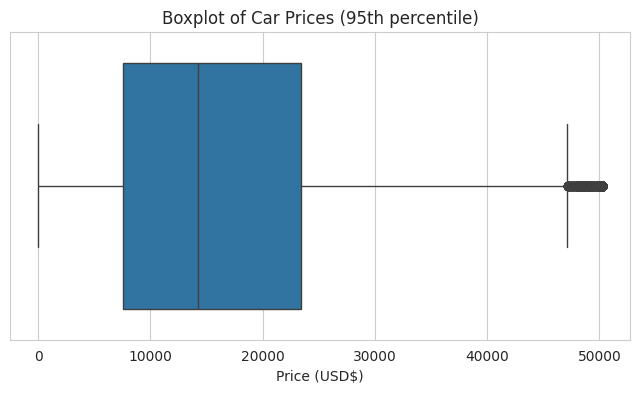

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'].clip(upper=df['price'].quantile(0.95)))
plt.title("Boxplot of Car Prices (95th percentile)")
plt.xlabel("Price (USD$)")
plt.show()


💡 **Observations:**  

- The majority of car prices fall between $18,000 and $24,000.

- Extreme luxury or rare vehicles drive the distribution’s long right tail.

- The bulk of the dataset represents typical consumer vehicles, not high-end outliers.

### Analyze `levy`

In [9]:
# Summary stats
print("Levy Summary:\n", df['levy'].describe())

# Skewness & Kurtosis
print("\nSkewness:", df['levy'].skew())
print("Kurtosis:", df['levy'].kurt())

Levy Summary:
 count    15697.000000
mean       562.179716
std        558.754267
min          0.000000
25%          0.000000
50%        639.000000
75%        862.000000
max      11714.000000
Name: levy, dtype: float64

Skewness: 2.9599056127478742
Kurtosis: 38.99045800451407


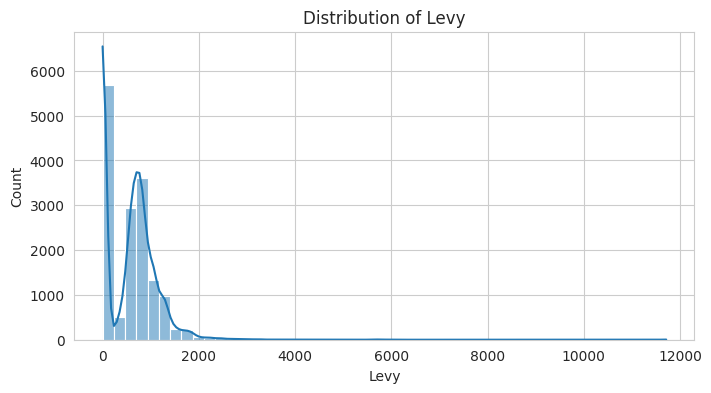

In [10]:

# Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['levy'], bins=50, kde=True)
plt.title("Distribution of Levy")
plt.xlabel("Levy")
plt.show()

**💡 Observations**

- Median (639) is higher than the mean (562), showing a concentration of lower values with a long right tail.

- 25% of cars have levy = 0.

- Distribution is moderately skewed (Skewness ≈ 2.96) with heavy tails (Kurtosis ≈ 39), suggesting strong outliers.

- The maximum levy (11,714) is far beyond the 75th percentile (862), indicating presence of extreme values.

> *🧠 Investigate whether levy = 0 should be treated as missing.*

#### 🔍 Investigating levy = 0


> Objective: Determine whether levy = 0 represents a true zero or indicates missing/unknown values.

In [11]:
zero_count = (df['levy'] == 0).sum()
zero_pct = zero_count / len(df) * 100
print(f"Levy = 0 → {zero_count} rows ({zero_pct:.2f}%)")


Levy = 0 → 5659 rows (36.05%)


💡 **Observations:**  
- levy = 0 occurs in 5,659 rows, which is 36.05% of the dataset.
- This is a substantial portion, so we need to investigate whether these zeros are true exemptions (e.g., for certain car years or categories) or missing/unknown values.

> *🧠 Further analysis with car age, price, and category will guide whether to keep, impute, or flag these zeros in preprocessing.*

In [ ]:
# 🍀 Create car_age column
current_year = 2025  # or use datetime.now().year
df['car_age'] = current_year - df['prod_year']

# Define bins and labels
bins = [0, 5, 10, 15, 20, 30, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-50']

# Bin car ages
age_groups = pd.cut(df['car_age'], bins=bins, labels=labels, right=True)

# Proportion of levy=0 by age group
levy_zero_by_age = df.groupby(age_groups, observed=True)['levy'].apply(lambda x: (x==0).mean())


# Convert to DataFrame for tabulate
levy_table = levy_zero_by_age.reset_index()
levy_table.columns = ['Car Age Group', 'Proportion of levy=0']

# Print table
print(tabulate(levy_table, headers='keys', tablefmt='grid', showindex=False))


+-----------------+------------------------+
| Car Age Group   |   Proportion of levy=0 |
+=================+========================+
| 0-5             |              0.186047  |
+-----------------+------------------------+
| 6-10            |              0.0910034 |
+-----------------+------------------------+
| 11-15           |              0.215335  |
+-----------------+------------------------+
| 16-20           |              0.648907  |
+-----------------+------------------------+
| 21-30           |              0.950131  |
+-----------------+------------------------+
| 31-50           |              0.97619   |
+-----------------+------------------------+


**💡 Observations**

- Newer cars (0–5 years) have a relatively low proportion of levy=0 (≈18.6%).

- Levy=0 is relatively low for newer cars (0–15 years) but rises sharply for older cars.

- 21–30 years old cars and 31–50 years old cars almost entirely have levy=0, which may reflect obsolete or missing levy data for very old cars.

> *🧠 Levy=0 is strongly correlated with car age.*

> *🧠 most likely represent missing values for old cars*